importing Libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Data Preprocessing

Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 18345 files belonging to 10 classes.


Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4585 files belonging to 10 classes.


In [5]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[116.25  97.25  91.25]
   [114.75  95.75  89.75]
   [121.5  102.5   96.5 ]
   ...
   [167.25 156.25 152.25]
   [162.75 151.75 147.75]
   [161.   150.   146.  ]]

  [[112.75  93.75  87.75]
   [117.5   98.5   92.5 ]
   [125.5  106.5  100.5 ]
   ...
   [161.5  150.5  146.5 ]
   [166.75 155.75 151.75]
   [163.5  152.5  148.5 ]]

  [[117.75  98.75  92.75]
   [122.75 103.75  97.75]
   [122.25 103.25  97.25]
   ...
   [161.75 150.75 146.75]
   [170.   159.   155.  ]
   [162.5  151.5  147.5 ]]

  ...

  [[125.75 111.75 110.75]
   [116.5  102.5  101.5 ]
   [125.5  111.5  110.5 ]
   ...
   [145.5  135.5  134.5 ]
   [146.25 136.25 135.25]
   [156.75 146.75 145.75]]

  [[112.5   98.5   97.5 ]
   [119.75 105.75 104.75]
   [112.75  98.75  97.75]
   ...
   [150.   140.   139.  ]
   [149.   139.   138.  ]
   [156.5  146.5  145.5 ]]

  [[113.25  99.25  98.25]
   [104.    90.    89.  ]
   [120.   106.   105.  ]
   ...
   [148.   138.   137.  ]
   [151.   141.   140.  ]
   [153.5  143.5  14

Building Model

In [7]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential()

## Building Convolution layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
model.add(Dense(units=38,activation='softmax'))

Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Model Traaining 

In [21]:
model.pop()  
model.add(Dense(units=10, activation='softmax'))  

In [ ]:
training_history = model.fit(training_set, validation_data=validation_set, epochs=1)

574/574 [==============================] - 2026s 4s/step - loss: 1.0700 - accuracy: 0.6249 - val_loss: 0.6612 - val_accuracy: 0.7666


Model Evaluation

In [24]:
train_loss,train_acc = model.evaluate(training_set)

574/574 [==============================] - 146s 254ms/step - loss: 0.6318 - accuracy: 0.7818


In [25]:
print(train_loss,train_acc)

0.6317784190177917 0.7818478941917419


In [26]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

144/144 [==============================] - 36s 251ms/step - loss: 0.6612 - accuracy: 0.7666


In [27]:
print(val_loss,val_acc)

0.6611607074737549 0.7666302919387817


Saving Model

In [28]:
model.save("trained_model.keras")

In [29]:
training_history.history

{'loss': [1.0699634552001953],
 'accuracy': [0.6248568892478943],
 'val_loss': [0.6611608862876892],
 'val_accuracy': [0.7666302919387817]}

In [30]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [31]:
training_history.history['val_accuracy']

[0.7666302919387817]

Accuracy Visualization

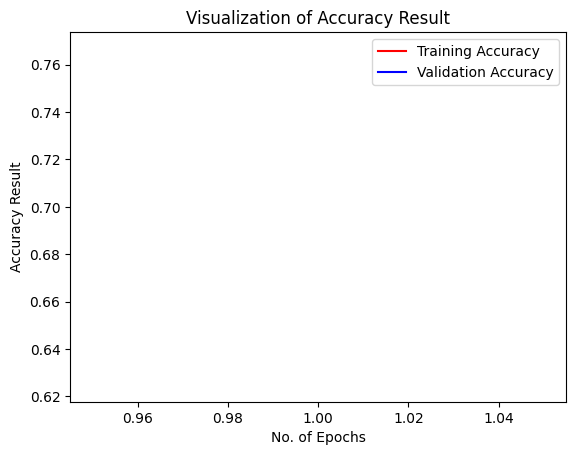

In [35]:
# Adjust the epochs list to match the length of the accuracy history
epochs = [i for i in range(1, len(training_history.history['accuracy']) + 1)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

Some other metrics for model evaluation

In [36]:
class_name = validation_set.class_names
class_name

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 4585 files belonging to 10 classes.


In [38]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

144/144 [==============================] - 37s 254ms/step


(array([[9.6515447e-01, 2.3624049e-02, 2.0406165e-03, ..., 1.8839162e-03,
         1.5506916e-05, 4.3820555e-06],
        [9.4928825e-01, 4.3747663e-02, 5.2571791e-04, ..., 1.8077795e-03,
         4.5118562e-05, 6.7300198e-06],
        [9.9624890e-01, 2.6944522e-03, 2.1686468e-04, ..., 2.2389661e-04,
         1.3536055e-06, 1.1588306e-06],
        ...,
        [5.5689557e-04, 2.3661784e-04, 9.8171532e-03, ..., 1.8925637e-04,
         8.8179037e-03, 9.4685382e-01],
        [2.0738291e-04, 1.1204050e-04, 2.8410712e-03, ..., 3.8907383e-05,
         1.1334926e-03, 9.8828644e-01],
        [5.7865532e-07, 5.2176547e-05, 7.0252674e-05, ..., 1.6148509e-06,
         8.9444668e-04, 9.8919594e-01]], dtype=float32),
 (4585, 10))

In [39]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [40]:
predicted_categories

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [41]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(4585, 10), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(4585,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9], dtype=int64)>

In [43]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.88      0.85      0.87       425
                        Tomato___Early_blight       0.65      0.62      0.63       480
                         Tomato___Late_blight       0.86      0.60      0.71       463
                           Tomato___Leaf_Mold       0.86      0.75      0.80       470
                  Tomato___Septoria_leaf_spot       0.65      0.63      0.64       436
Tomato___Spider_mites Two-spotted_spider_mite       0.90      0.50      0.65       435
                         Tomato___Target_Spot       0.74      0.75      0.75       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.83      0.97      0.89       490
                 Tomato___Tomato_mosaic_virus       0.59      0.98      0.74       448
                             Tomato___healthy       0.87      0.98      0.92       481

                                     accu

In [45]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[362,  11,   6,   0,  12,   0,   1,  29,   3,   1],
       [ 14, 296,  23,  18,  34,   3,  34,  23,  34,   1],
       [  8,  84, 277,  13,  39,   1,   5,   8,  13,  15],
       [  1,  24,   1, 354,  41,   3,   0,   5,  41,   0],
       [ 18,  15,   8,  25, 275,   4,  10,  10,  64,   7],
       [  4,  10,   0,   0,   4, 219,  66,  23, 103,   6],
       [  2,  10,   0,   0,  16,  12, 344,   1,  39,  33],
       [  2,   3,   2,   0,   1,   1,   0, 476,   5,   0],
       [  0,   0,   1,   0,   1,   0,   0,   0, 441,   5],
       [  0,   0,   3,   0,   3,   0,   3,   0,   1, 471]], dtype=int64)

Confusion Matrix Visualization

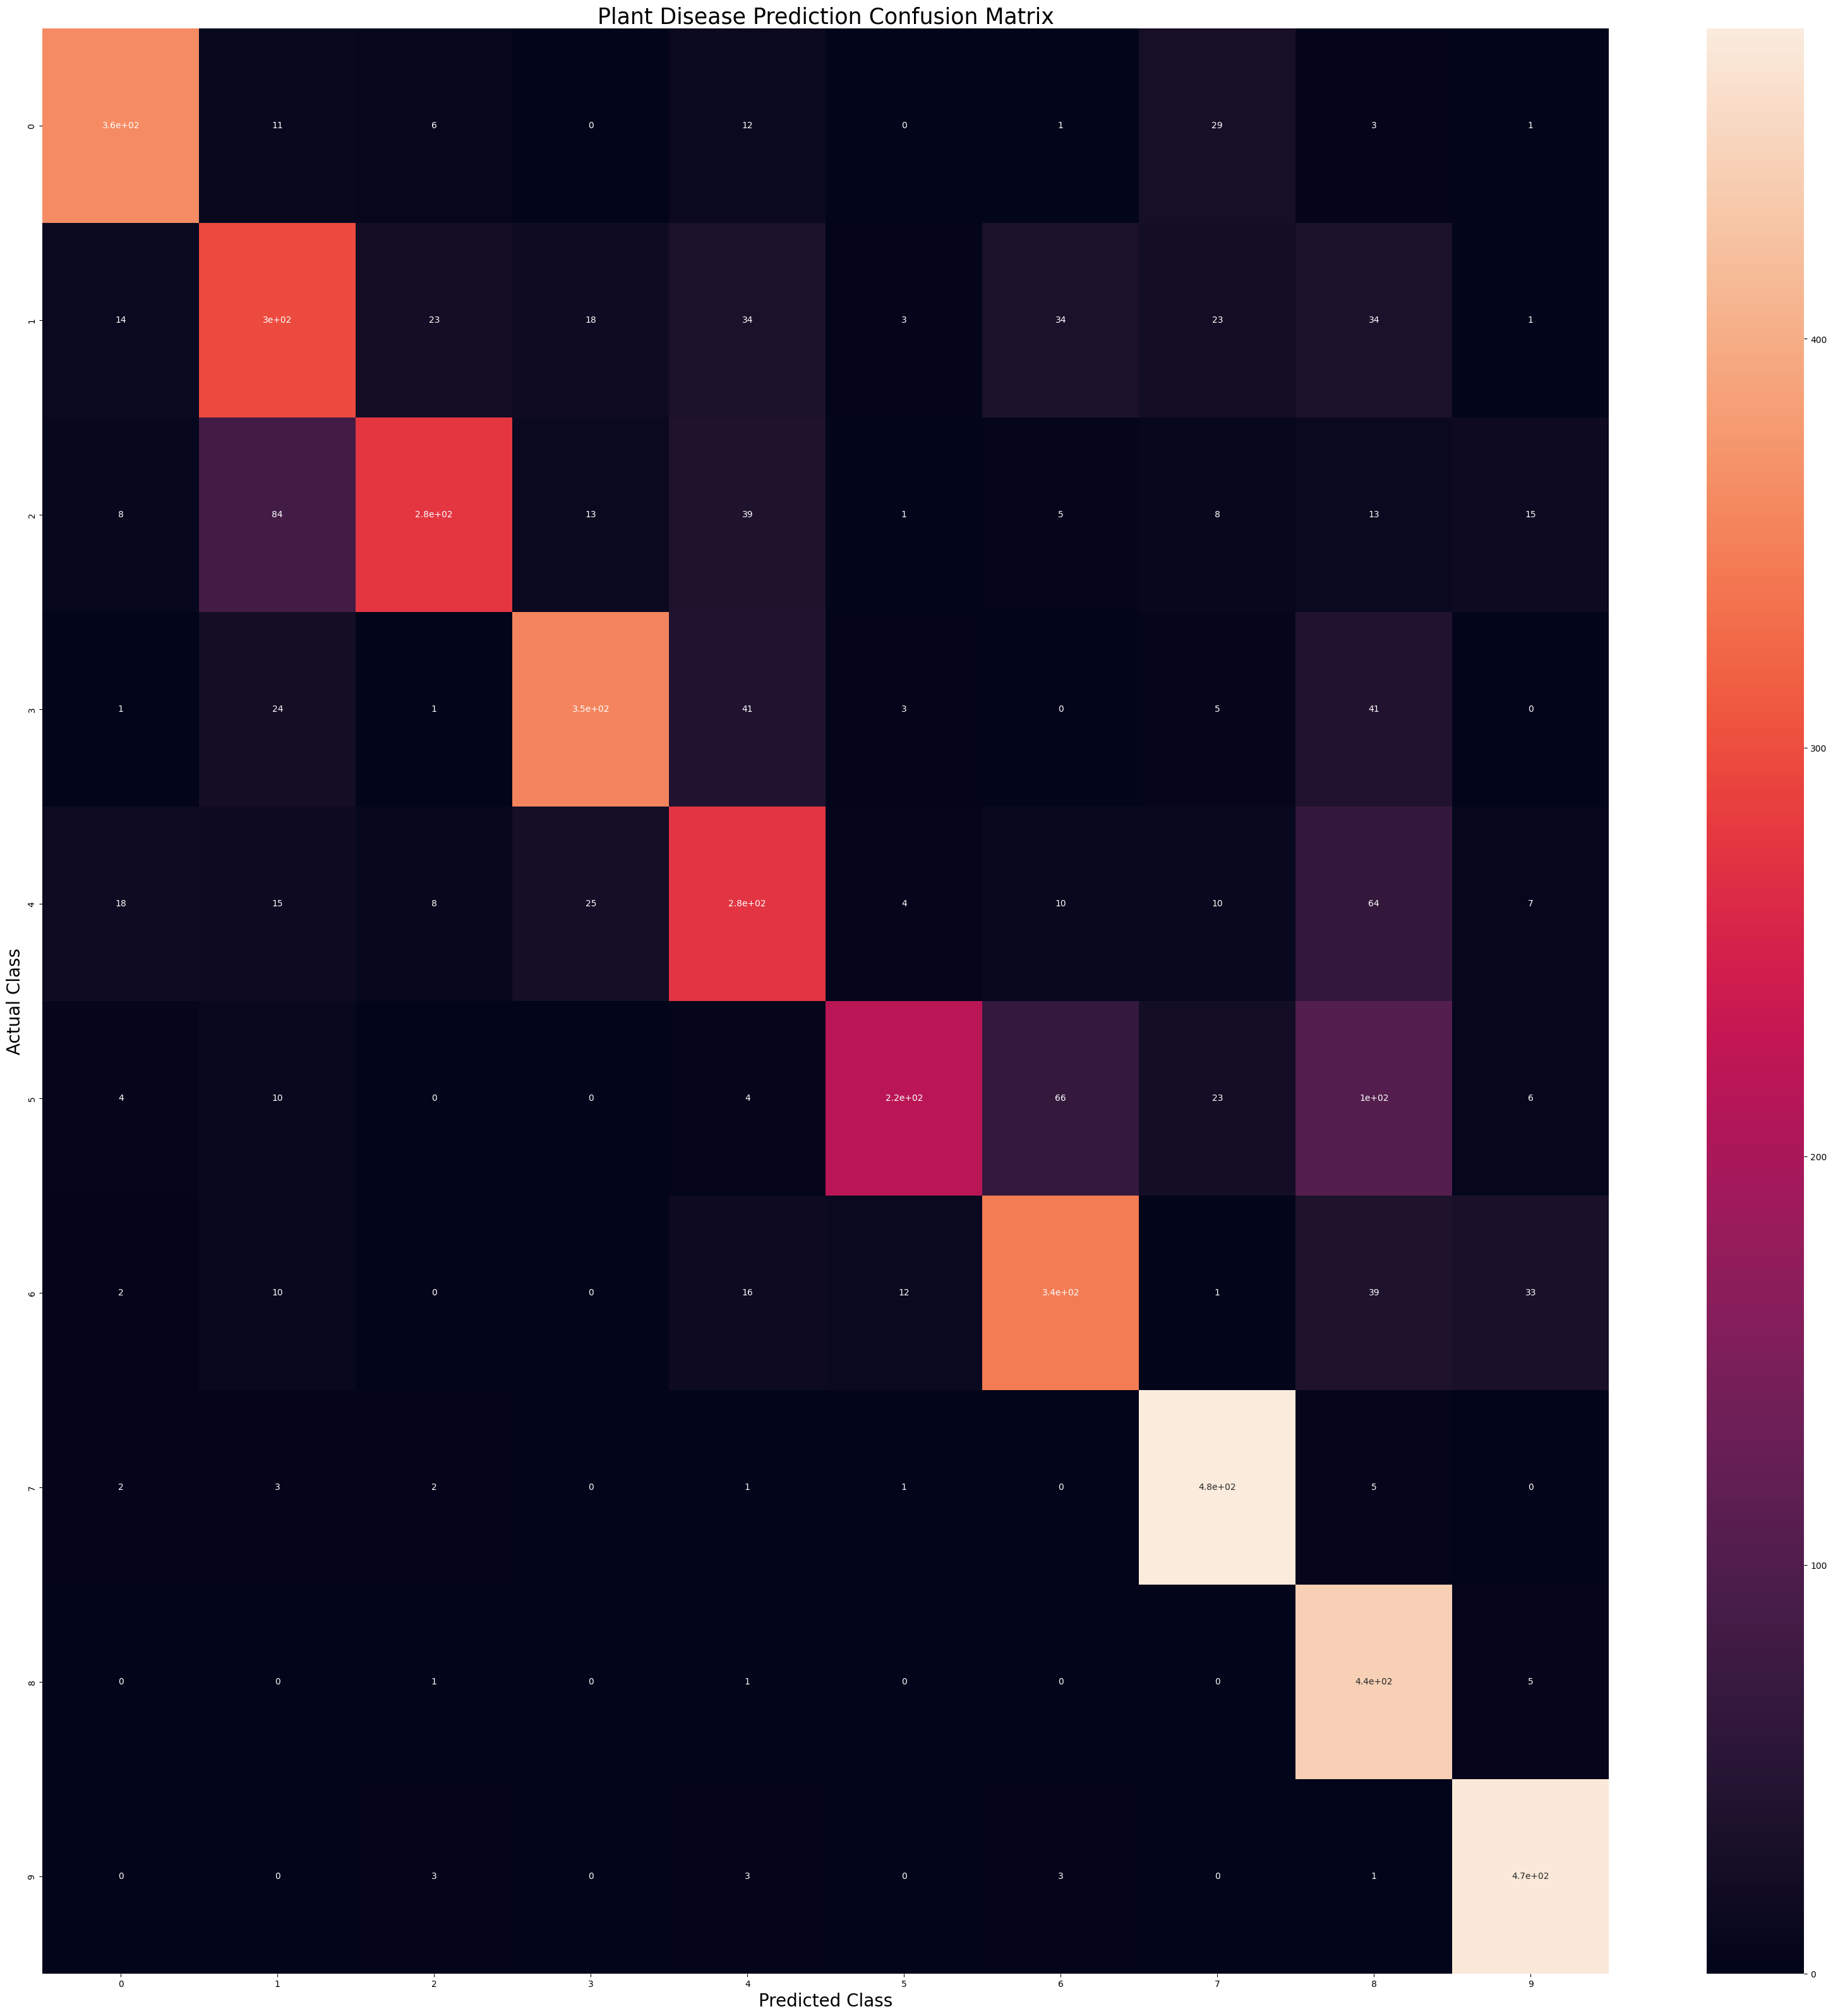

In [46]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()